In [1]:
import os
import shutil
import random
from shutil import copyfile

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt

# Prepare the dataset

In [ ]:
# Define image directories and files
source_path = './tmp/images/tomato-datasets'

source_path_ripe = os.path.join(source_path, 'Ripe')
source_path_unripe = os.path.join(source_path, 'Unripe')

In [ ]:
# Define the root directory
root_dir = './tmp/images/Tomatos'

# Empty directory to prevent FileExistError is the function run several times.
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)
    
def create_train_val_dirs(root_path):
    train_dir = os.path.join(root_dir, 'Train')
    os.makedirs(train_dir)
    
    validation_dir = os.path.join(root_dir, 'Validation')
    os.makedirs(validation_dir)
    
    train_ripe_dir = os.path.join(train_dir, 'Ripe')
    os.makedirs(train_red_dir)
    
    train_unripe_dir = os.path.join(train_dir, 'Unripe')
    os.makedirs(train_green_dir)
    
    validation_ripe_dir = os.path.join(validation_dir, 'Ripe')
    os.makedirs(validation_red_dir)
    
    validation_unripe_dir = os.path.join(validation_dir, 'Unripe')
    os.makedirs(validation_green_dir)
    
    
try:
    create_train_val_dirs(root_path=root_dir)
except FileExistError:
    print("you should see this if there is somethings wrong in folder creation. ")

# Data augmentation

In [2]:
# Define the root directory
root_dir = './tmp/images/Tomatos'

train_dir = os.path.join(root_dir, 'Train')
validation_dir = os.path.join(root_dir, 'Validation')

# Directory with training pictures
train_ripe_dir = os.path.join(train_dir, 'Ripe')
train_unripe_dir = os.path.join(train_dir, 'Unripe')

# Directory with validation pictures
validation_ripe_dir = os.path.join(validation_dir, 'Ripe')
validation_unripe_dir = os.path.join(validation_dir, 'Unripe')


# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255.)


# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size = 16,
                                                   class_mode = 'binary',
                                                   target_size = (300, 300))

# Flow training images in batches of 16 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       batch_size = 16,
                                                       class_mode = 'binary',
                                                       target_size = (300, 300))


Found 180 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
# Train the model
history = model.fit(train_generator,
                   validation_data = validation_generator,
                   steps_per_epoch = 12,
                   epochs = 8,
                   validation_steps = 3,
                   verbose = 2)

# Sequential model

In [3]:
model = tf.keras.Sequential([
    # First Convolution layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second Convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third Convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth Convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten and feed into DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       1

In [5]:
model.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='binary_crossentropy',
                  metrics = ['accuracy'])

In [6]:
# Train the model
history = model.fit(train_generator,
                   validation_data = validation_generator,
                   steps_per_epoch = 12,
                   epochs = 10,
                   validation_steps = 3,
                   verbose = 2)

Epoch 1/10
12/12 - 21s - loss: 0.6873 - accuracy: 0.5889 - val_loss: 0.6553 - val_accuracy: 0.5500
Epoch 2/10
12/12 - 23s - loss: 0.6210 - accuracy: 0.6667 - val_loss: 0.5325 - val_accuracy: 0.9250
Epoch 3/10
12/12 - 22s - loss: 0.4925 - accuracy: 0.8278 - val_loss: 0.3670 - val_accuracy: 0.9000
Epoch 4/10
12/12 - 21s - loss: 0.2849 - accuracy: 0.9444 - val_loss: 0.1695 - val_accuracy: 0.9750
Epoch 5/10
12/12 - 24s - loss: 0.1567 - accuracy: 0.9500 - val_loss: 0.1393 - val_accuracy: 1.0000
Epoch 6/10
12/12 - 20s - loss: 0.1682 - accuracy: 0.9389 - val_loss: 0.0911 - val_accuracy: 1.0000
Epoch 7/10
12/12 - 18s - loss: 0.1153 - accuracy: 0.9667 - val_loss: 0.0538 - val_accuracy: 0.9750
Epoch 8/10
12/12 - 19s - loss: 0.0677 - accuracy: 0.9667 - val_loss: 0.0442 - val_accuracy: 1.0000
Epoch 9/10
12/12 - 22s - loss: 0.0335 - accuracy: 0.9944 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 10/10
12/12 - 19s - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000


# Evaluate the results

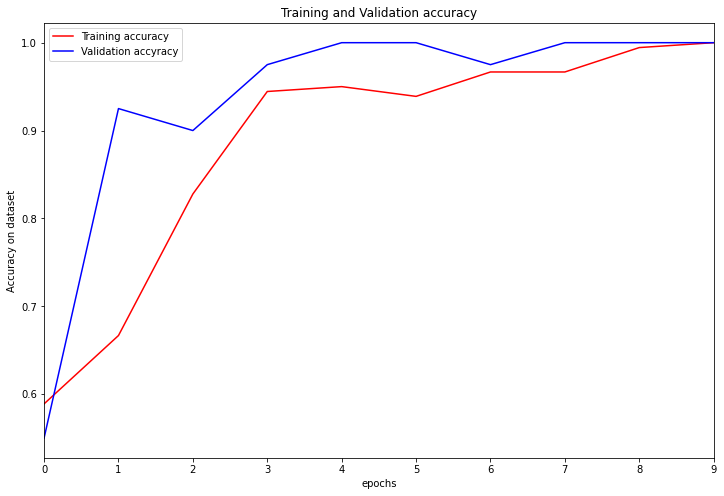

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig = plt.figure(figsize=(12,8))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accyracy')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.xlim([0,9])
plt.ylabel('Accuracy on dataset')
plt.legend(loc=0)
# plt.figure()
plt.show()
fig.savefig('./tmp/accuracy.jpg')
plt.close(fig)

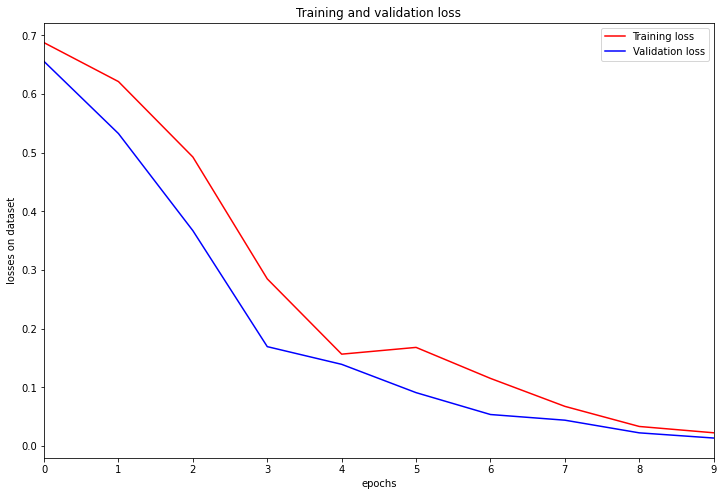

In [25]:
fig = plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,9])
plt.ylabel('losses on dataset')
plt.title("Training and validation loss")
plt.show()
fig.savefig('./tmp/loss.jpg')
plt.close(fig)

# Visualization Convolutional layers and max pool layer

C:\Users\Lemi Debele\AppData\Local\Temp/ipykernel_34432/3261207241.py:32: RuntimeWarning: invalid value encountered in true_divide
  x = x/x.std()


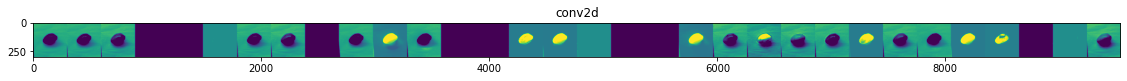

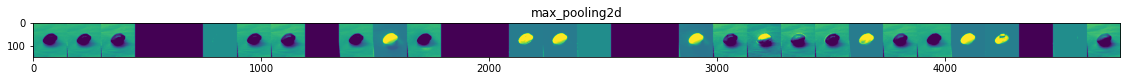

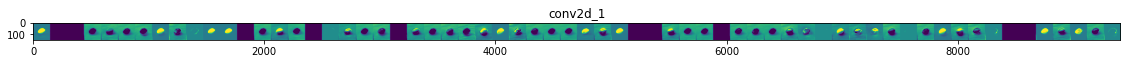

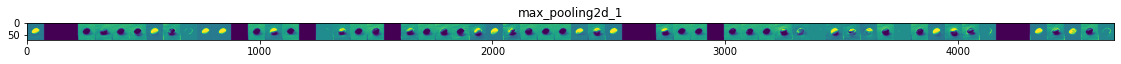

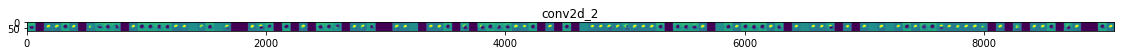

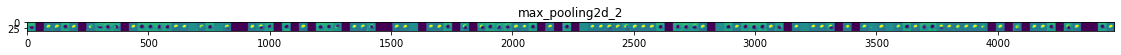

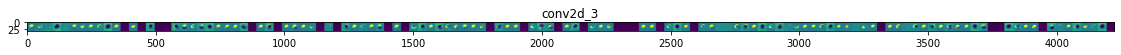

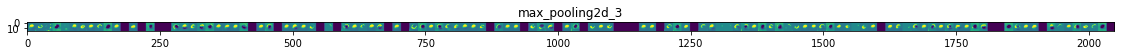

In [36]:
train_red_fnames = os.listdir(train_red_dir)
train_green_fnames = os.listdir(train_green_dir)

layers_outputs = [layer.output for layer in model.layers]
visulaization_model = tf.keras.models.Model(inputs=model.inputs, outputs=layers_outputs)

# Let's prepare a random input image from the training set.
red_img_files = [os.path.join(train_red_dir, f) for f in train_red_fnames]
green_img_files = [os.path.join(train_green_dir, f) for f in train_green_fnames]
img_path = random.choice(red_img_files+green_img_files)

img = image.load_img(img_path, target_size=(300, 300))
x = image.img_to_array(img) # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 300, 300, 3)

# Rescale
x = x/255

successive_feature_maps = visulaization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape)==4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size*n_features))
    
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x = x -x.mean()
      x = x/x.std()
      x = x*64 + 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i*size : (i+1)*size] = x

    scale = 20. / n_features 
    plt.figure(figsize=(scale*n_features, scale))
    plt.grid(False)
    plt.title(layer_name)
    plt.imshow(display_grid)

# Model Prediction

In [ ]:
from keras.preprocessing import image

path = './tmp/images/10.png'
img = image.load_img(path, target_size=(300,300))
x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
classes = model.predict(image)
print(classes[0])
if classes[0]>0.5:
    print("This is a Red tomatos")
else:
    print("This is a Green tomatos")

# Saving the model

In [37]:
model.save('my_model.h5')